In [351]:
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
from IPython.display import Image

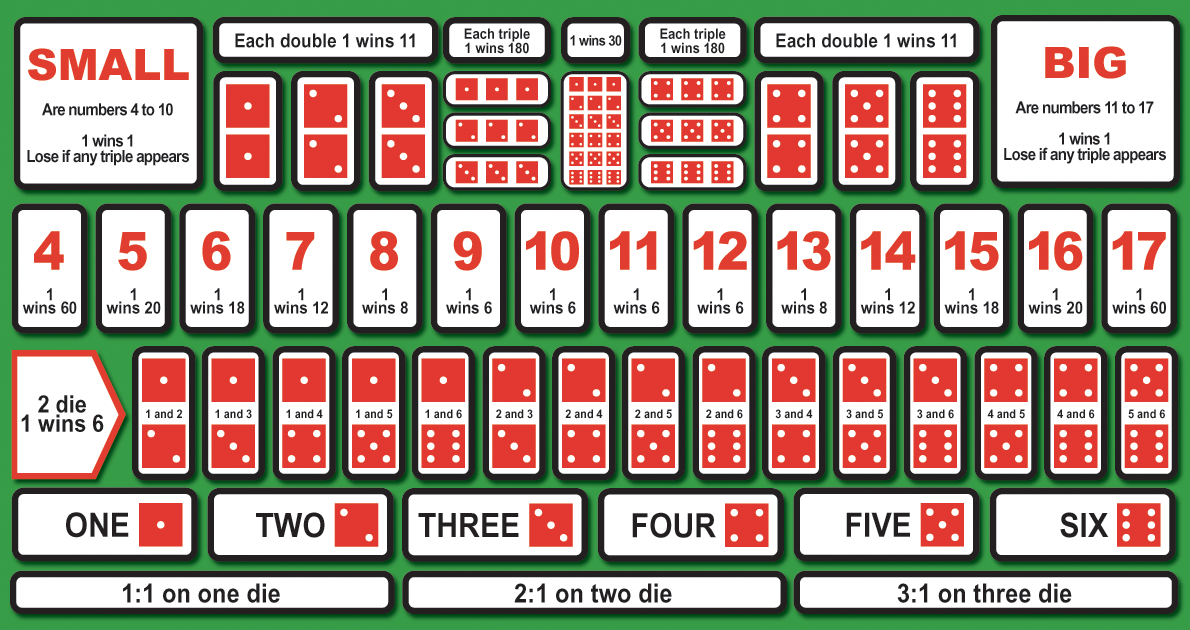

In [352]:
# Betting table screenshot 
Image("/Users/jasonchan/images/sicbo.png")

In [353]:
info = DataFrame({
        "Small": [0.486, 0.0278, -0.0278],
        "Big": [0.486, 0.0278, -0.0278]
    
    
    }, index = ["P(Win)", "House Edge", "Return"])

In [354]:
#information on bets
info

,Big,Small
P(Win),0.4860,0.4860
House Edge,0.0278,0.0278
Return,-0.0278,-0.0278


In [355]:
# Minimum bet: 200
# 1 to 1 pay
# Rulea:
# - loss if any triple
# - 3 or 18 is considered loss because only achievable with triples

In [356]:
#simulation code
simnum = 500
all_data = DataFrame(index = np.arange(1,simnum + 1), columns = ["Sum", "Verdict"])
all_data.index.name = "Trials"

for i in range(1, simnum + 1):
    a = np.random.randint(1,7,3)
    if a[0]==a[1]==a[2]:
        all_data.Sum[i] = None
        all_data.Verdict[i] = "Lose"
    else:
        all_data.Sum[i] = a.sum()
        if all_data.Sum[i] >= 11:
            all_data.Verdict[i] = "Big"
        else:
            all_data.Verdict[i] = "Small"

all_data.head()

,Sum,Verdict
Trials,,
1,13,Big
2,10,Small
3,9,Small
4,9,Small
5,9,Small


In [357]:
verdict = all_data["Verdict"]
verdict_data = Series.to_dict(verdict.value_counts())
verdict_data

{'Big': 234, 'Lose': 14, 'Small': 252}

In [358]:
import plotly 
plotly.tools.set_credentials_file(username='JasonChanJinAn', api_key='g71g5chawk')

In [359]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=['Small', 'Big', 'Lose'],
            y=[verdict_data["Small"], verdict_data["Big"], verdict_data["Lose"]]
    )]

py.iplot(data, filename='basic-bar')



In [360]:
all_data.ix[[2, 3],["Sum"]]

,Sum
Trials,
2,10
3,9


In [361]:
all_data[1:3]["Sum"]

Trials
2    10
3     9
Name: Sum, dtype: object

In [362]:
all_data.Sum[2:5], all_data.Verdict[2:5]

(Trials
 3    9
 4    9
 5    9
 Name: Sum, dtype: object, Trials
 3    Small
 4    Small
 5    Small
 Name: Verdict, dtype: object)

In [363]:
all_data.describe()

,Sum,Verdict
count,486,500
unique,14,3
top,10,Small
freq,76,252
